# Previsão de Aprovação de Cartão de Crédito: Um Estudo de Machine Learning para Mitigação de Riscos Financeiros

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/Capa.png" alt="capa">

---

# **Machine Learning** • Credit Card Approval Prediction

Bem-vindo(a)!!! Meu nome é Enzo Schitini, sou cientista de dados e neste projeto de "Previsão de Aprovação de Cartão de Crédito", utilizamos técnicas de machine learning para desenvolver um modelo capaz de prever a aprovação ou rejeição de solicitações de cartão de crédito. Analisamos dados históricos de clientes, incluindo informações demográficas e financeiras, para identificar padrões que influenciam a decisão de aprovação. 

Nosso objetivo é fornecer às instituições financeiras uma ferramenta precisa para minimizar riscos de crédito e otimizar o processo de concessão, assegurando que apenas clientes qualificados sejam aprovados.

**Data Science** Portfólio | *22 Agosto 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist & Data Analyst • Expert Bubble.io • UX & UI @ Scituffy creator

---

## O que você vai encontrar neste notebook? 👋

Este projeto visa desenvolver um modelo de machine learning capaz de prever a aprovação de crédito para novos clientes de um banco. A análise se concentrará em dados demográficos, financeiros e de comportamento de clientes existentes, com o objetivo de identificar padrões que podem ser utilizados para otimizar o processo de concessão de crédito.

O processo de aprovação de crédito é crucial para qualquer instituição financeira, pois impacta diretamente a lucratividade e o risco do negócio. No entanto, o volume crescente de solicitações exige métodos eficientes para analisar e classificar os candidatos. É nesse contexto que a análise de dados e o machine learning surgem como ferramentas poderosas para automatizar e melhorar a tomada de decisão.

#### Os pilares da análise:

- Descobrir os fatores que influenciam a saúde dos bebês.
- Entender melhor as raças e o nível educacional das mães.
- Analisaremos as menores de idade, meninas que constroem família antes dos 18 anos.
- O que nos diz a escolha do parto entre cesariana ou parto vaginal?
- E finalmente melhor compreender a população do estado de Rondônia no Brasil em 2019 e construir a um pouco do que seria o 'Rosto da população'.

*Além disso, exploraremos o impacto das variáveis ​​sociorraciais nas condições de nascimento e nos indivíduos*

#### - *Contexto dos Dados*

Com o aumento do uso de cartões de crédito, é essencial que as instituições financeiras possam tomar decisões informadas sobre a concessão de crédito. Uma decisão inadequada pode resultar em perdas financeiras significativas, seja pela concessão de crédito a clientes com alta probabilidade de inadimplência, ou pela rejeição de clientes com bom potencial de crédito. A utilização de técnicas de machine learning pode transformar a forma como essas decisões são feitas, tornando o processo mais eficiente e preciso.

#### - *Origem dos Dados*

<img src="" alt="capa" width="310">

> Você pode acessar os dados pelo [kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

#### - *Metodologia*

A análise será conduzida utilizando técnicas estatísticas e de visualização de dados para identificar padrões e anomalias. Será empregado o Python como ferramentas de manipulação e análise dos dados, na limpeza e preparação dos dados para garantir a qualidade das análises e do modelo de Machine Learning.

#### - *Importância do Projeto*

# 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação do ambiente de desenvolvimento</li>
  <li>Estrutura e tratamento dos dados e colunas</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>✨ Insights ✨</li>
</ol>

---

# Preparação do ambiente de desenvolvimento

### Importando os pacotes

In [306]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import chi2_contingency
import missingno as msno
pd.set_option('display.max_columns', None)

### Códigos em python

### Funções que vamos usar para gerar os gráficos da análise

In [307]:
def Heatmap_Default(contingency_table):
    # Converter a tabela de contingência em um formato adequado para o Plotly
    #heatmap_data = contingency_table.reset_index().melt(id_vars='CODE_GENDER', var_name='Default', value_name='Count')

    # Criar o heatmap
    fig = px.imshow(
        contingency_table,
        text_auto=True,
        aspect='auto',
        labels={'x': 'Default', 'y': 'CODE_GENDER', 'color': 'Count'},
        color_continuous_scale = ["red", "yellow", "green"],
        title='Heatmap entre Default e CODE_GENDER'
    )
    fig.update_layout(title = "<b> Vendas de boba </b>",
                        coloraxis_showscale = False)

    # Mostrar o gráfico
    fig.show()
    
    # Heatmap_Default(pd.crosstab(df['NAME_INCOME_TYPE'], df['Default']))

### Carregando os Datasets

In [308]:
url = 'https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/EBAC/credito.csv'

df = pd.read_csv(url, na_values='na')#.drop(columns='Unnamed: 0')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# Análise Exploratória

Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

## Estrutura e tratamento dos dados e colunas

In [309]:
df.drop_duplicates(inplace=True)

In [310]:
def status_dataframe(dataframe:pd.DataFrame):
    df_columns_name = dataframe.columns.to_list()

    types_list = [str(type(dataframe[col][0])).split("'")[1] for col in dataframe.columns]
    lista_categorias = [dataframe[col].nunique() for col in dataframe.columns]

    elementos_nulos = elementos_nulos = dataframe.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentagem_dados_nulos = round((dataframe.isnull().sum() / dataframe.shape[0]) * 100)
    percentagem_dados_nulos = percentagem_dados_nulos.to_list()

    print(f'Esse datafame contém {dataframe.shape[1]} colunas e {dataframe.shape[0]} linhas')

    dados_status = pd.DataFrame({'Nome': df_columns_name, 
                            'Tipo': types_list, 
                            'qnt_categorias': lista_categorias,
                            'Dados nulos' : elementos_nulos,
                            'Dados nulos %' : percentagem_dados_nulos})
    return dados_status

display(status_dataframe(df))
display(df.head())

Esse datafame contém 16 colunas e 10127 linhas


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
0,id,numpy.int64,10127,0,0.0
1,default,numpy.int64,2,0,0.0
2,idade,numpy.int64,45,0,0.0
3,sexo,str,2,0,0.0
4,dependentes,numpy.int64,6,0,0.0
5,escolaridade,str,5,1519,15.0
6,estado_civil,str,3,749,7.0
7,salario_anual,str,5,1112,11.0
8,tipo_cartao,str,4,0,0.0
9,meses_de_relacionamento,numpy.int64,44,0,0.0


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**Descrição das Colunas do Dataset:**

| **Coluna**                  | **Descrição**                                                                                          |
|-----------------------------|--------------------------------------------------------------------------------------------------------|
| **id**                      | Identificação única para cada cliente.                                                                 |
| **default**                 | Indicador binário que mostra se o cliente está inadimplente (1) ou não (0).                           |
| **idade**                   | Idade do cliente em anos.                                                                             |
| **sexo**                    | Gênero do cliente, onde 'M' representa Masculino e 'F' Feminino.                                        |
| **dependentes**             | Número de dependentes do cliente.                                                                      |
| **escolaridade**            | Nível de escolaridade do cliente.                                                                      |
| **estado_civil**            | Estado civil do cliente.                                                                             |
| **salario_anual**           | Faixa de renda anual do cliente.                                                                       |
| **tipo_cartao**             | Tipo de cartão de crédito que o cliente possui.                                                        |
| **mesesderelacionamento**   | Duração do relacionamento do cliente com o banco em meses.                                              |
| **qtd_produtos**            | Quantidade de produtos financeiros que o cliente possui no banco.                                      |
| **iteracoes_12m**           | Número de interações do cliente com o banco nos últimos 12 meses.                                      |
| **mesesinativo12m**         | Número de meses que o cliente ficou inativo nos últimos 12 meses.                                      |
| **limite_credito**          | Limite de crédito disponível para o cliente.                                                           |
| **valortransacoes12m**      | Valor total das transações realizadas pelo cliente nos últimos 12 meses.                               |
| **qtdtransacoes12m**        | Número total de transações realizadas pelo cliente nos últimos 12 meses.                               |

## Dados faltantes

<Axes: >

C:\Users\Enzo Schitni\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\Enzo Schitni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



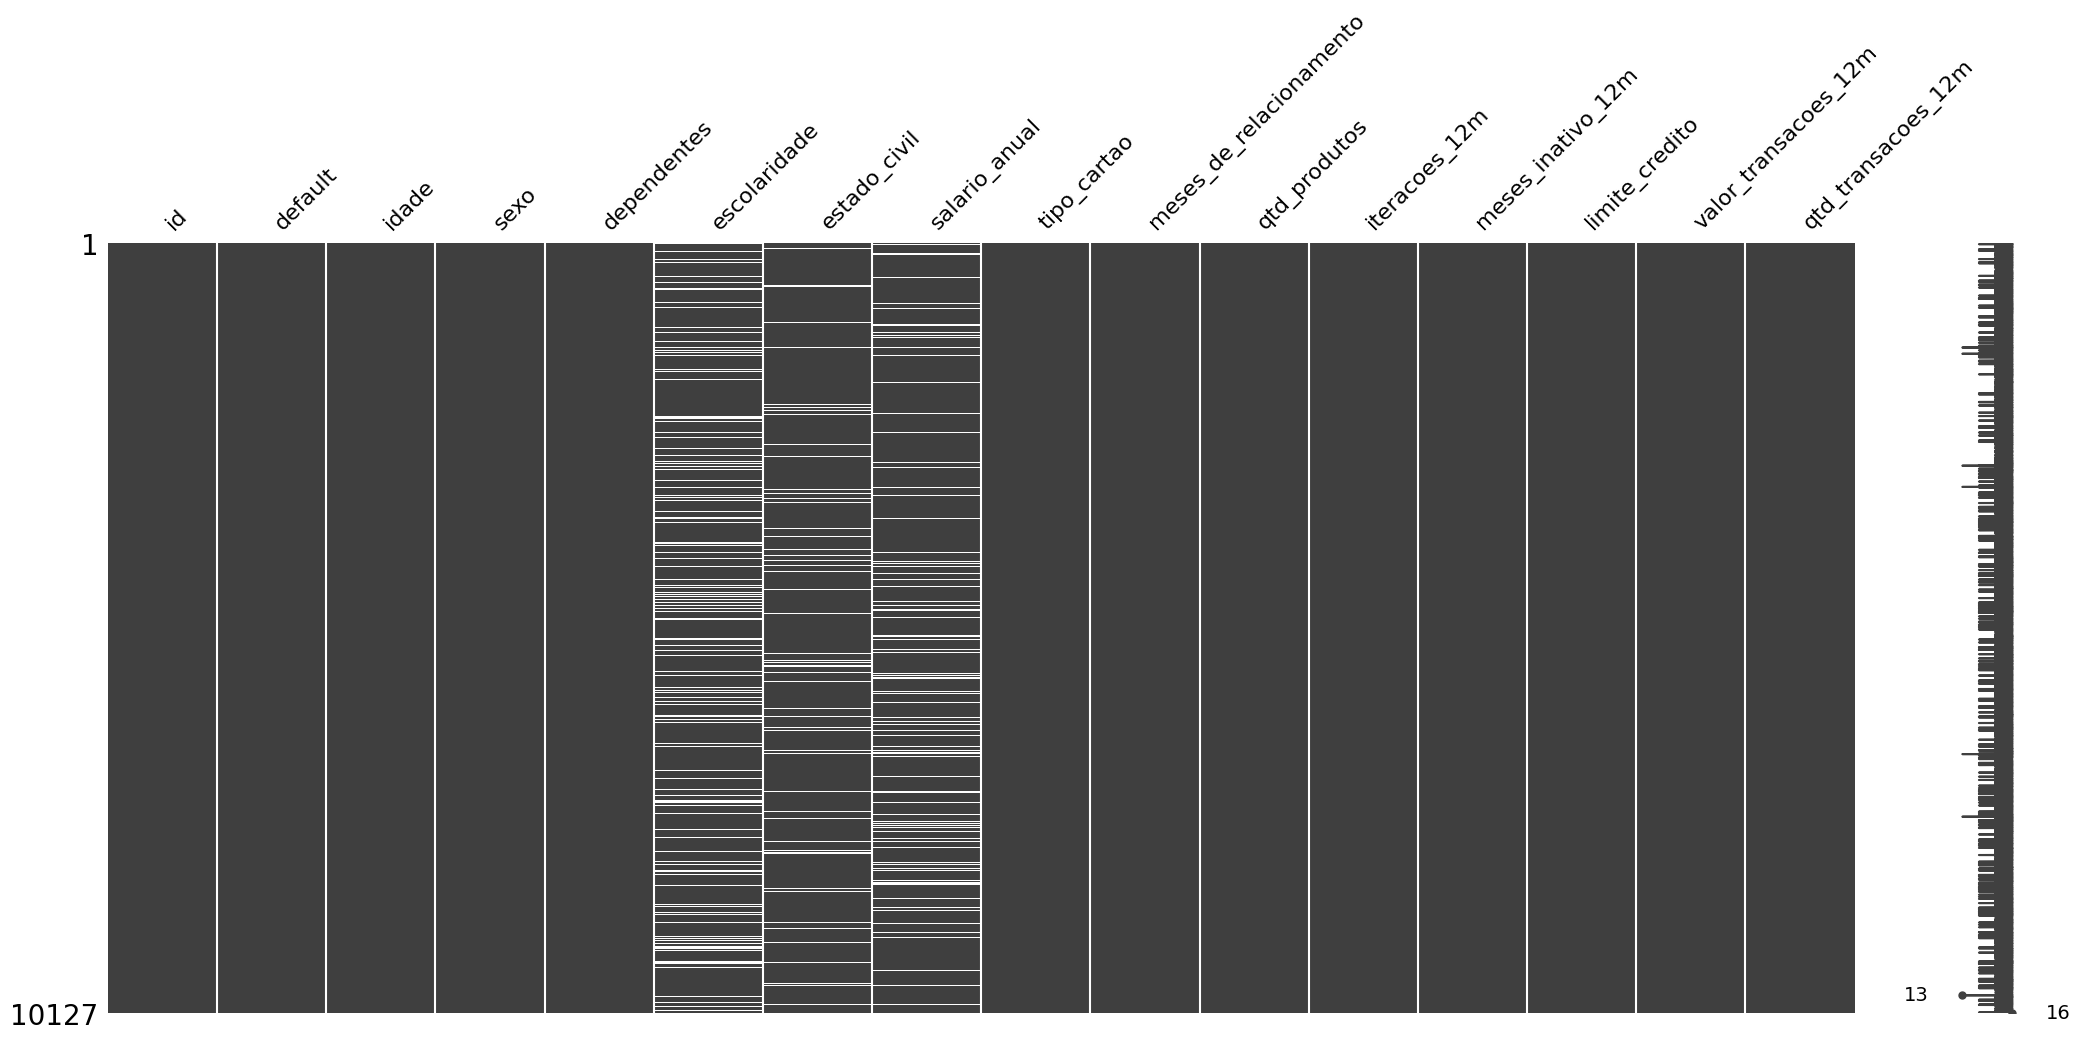

In [311]:
msno.matrix(df)

In [312]:
df_isnull = df[df.isnull().any(axis=1)]
df_isnull = pd.DataFrame(df_isnull)

df_isnull.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
10,708790833,0,42,M,5,sem educacao formal,NaN,$120K +,blue,31,5,2,3,"6.748,40","1.201,27",42
11,710821833,0,65,M,1,NaN,casado,$40K - $60K,blue,54,6,3,2,"9.095,59","1.314,42",26


In [313]:
df.dropna(inplace=True)
status_dataframe(df)[['Nome', 'Dados nulos', 'Dados nulos %']]

Esse datafame contém 16 colunas e 7081 linhas


,Nome,Dados nulos,Dados nulos %
0,id,0,0.0
1,default,0,0.0
2,idade,0,0.0
3,sexo,0,0.0
4,dependentes,0,0.0
5,escolaridade,0,0.0
6,estado_civil,0,0.0
7,salario_anual,0,0.0
8,tipo_cartao,0,0.0
9,meses_de_relacionamento,0,0.0


## Engenharia de atributos
Com base nas colunas existentes, podemos criar novas colunas (atributos) para melhorar a qualidade dos dados e aprimorar o modelo de machine learning:

In [314]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

1. **Informações Demográficas:**

- **idade_faixa**: Categoriza a idade em faixas (ex: '26-31', '32-37', '38-45', '46-51', '52-59', '60-65', '66+')

In [315]:
# Definindo as faixas etárias
bins = [26, 31, 37, 45, 51, 59, 65, float('inf')]
labels = ['26-31', '32-37', '38-45', '46-51', '52-59', '60-65', '66+']

# Categoriza as idades
df['idade_faixa'] = pd.cut(df['idade'], bins=bins, labels=labels, right=True)

2. **Métricas Financeiras:**
    - **taxautilizacaocredito**: Taxa de utilização do limite de crédito (valortransacoes12m / limite_credito).
    - **valormediotransacao**: Valor médio de cada transação (valortransacoes12m / qtdtransacoes12m).
    - **transacoespormes**: Média de transações por mês (qtdtransacoes12m / 12).

In [316]:
df['taxa_utilizacao_credito'] = df['valor_transacoes_12m'] / df['limite_credito']
df['valor_medio_transacao'] = df['valor_transacoes_12m'] / df['qtd_transacoes_12m']
df['transacoes_por_mes'] = df['qtd_transacoes_12m'] / 12

3. **Informações de Comportamento:**
    - **mesesativos12m**: Número de meses ativos nos últimos 12 meses (12 - mesesinativo12m).
    - **frequenciainteracao**: Frequência de interação do cliente com o banco (iteracoes_12m / mesesativos12m).

In [317]:
df['meses_ativos_12m'] = 12 - df['meses_inativo_12m']
df['interacoes_12m'] = df['iteracoes_12m']
df.drop(columns='iteracoes_12m', inplace=True)
df['frequencia_interacao'] = df['interacoes_12m'] / df['meses_ativos_12m']

4. **Combinação de Atributos:**
    - **idadeestadocivil**: Combinação da idade com o estado civil (ex: 30-40 Anos Casado, 40-50 Anos Solteiro, etc.).
    - **escolaridade_renda**: Combinação do nível de escolaridade com a faixa salarial (ex: Ensino Médio $40K - $60K, Mestrado $80K - $120K, etc.).

In [318]:
df['idade_estado_civil'] = df['idade'].astype(str) + ' - ' + df['estado_civil']
df['escolaridade_renda'] =  df['escolaridade'] + ' - ' + df['salario_anual']

5. **Atributos Categóricos:**
    - **faixa_idade**: Atributo categórico que classifica a idade em grupos (ex: Jovem, Adulto, Idoso).
    - **renda_alta**: Atributo binário (0 ou 1) que indica se a renda do cliente é alta (acima de $80K).

In [319]:
# Definindo as faixas etárias ajustadas
bins = [26, 30, 60, float('inf')]
labels = ['Jovem', 'Adulto', 'Idoso']

# Categoriza as idades
df['grupo_etario'] = pd.cut(df['idade'], bins=bins, labels=labels, right=True)

In [320]:
df['renda_alta'] = np.where(df['salario_anual'].isin(['$80K - $120K', '$120K +']), 1, 0)

### Ordenando as colunas

| **1. Variáveis Demográficas**       | **2. Variáveis Financeiras**     | **3. Variáveis de Tempo**      | **4. Variáveis do Cartão**     | **5. Variável de Default** |
|-------------------------------------|----------------------------------|--------------------------------|--------------------------------|----------------------------|
| id                                  | salario_anual                    | meses_de_relacionamento        | tipo_cartao                    | default                    |
| idade                               | limite_credito                   | interacoes_12m                 | taxa_utilizacao_credito        |                            |
| sexo                                | renda_alta                       | meses_inativo_12m              | valor_medio_transacao          |                            |
| dependentes                         |                                  | valor_transacoes_12m           | frequencia_interacao           |                            |
| escolaridade                        |                                  | qtd_transacoes_12m             | qtd_produtos                   |                            |
| estado_civil                        |                                  | transacoes_por_mes             |                                |                            |
| grupo_etario                        |                                  | meses_ativos_12m               |                                |                            |
| idade_faixa                         |                                  |                                |                                |                            |
| idade_estado_civil                  |                                  |                                |                                |                            |
| escolaridade_renda                  |                                  |                                |                                |                            |

In [321]:
df = df[[
    # 1. Variáveis Demográficas:
    'id', 'idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil', 'grupo_etario', 'idade_faixa',
    'idade_estado_civil', 'escolaridade_renda',

    # 2. Variáveis Financeiras:
    'salario_anual', 'limite_credito', 'renda_alta',

    # 3. Variáveis de Tempo:
    'meses_de_relacionamento', 'interacoes_12m', 'meses_inativo_12m',  'valor_transacoes_12m',
    'qtd_transacoes_12m', 'transacoes_por_mes', 'meses_ativos_12m',

    # 4. Variáveis do cartão:
    'tipo_cartao', 'taxa_utilizacao_credito', 'valor_medio_transacao', 'frequencia_interacao', 'qtd_produtos',

    # 5. Variável de default:
    'default'
    ]]

df.head()

,id,idade,sexo,dependentes,escolaridade,estado_civil,grupo_etario,idade_faixa,idade_estado_civil,escolaridade_renda,salario_anual,limite_credito,renda_alta,meses_de_relacionamento,interacoes_12m,meses_inativo_12m,valor_transacoes_12m,qtd_transacoes_12m,transacoes_por_mes,meses_ativos_12m,tipo_cartao,taxa_utilizacao_credito,valor_medio_transacao,frequencia_interacao,qtd_produtos,default
0,768805383,45,M,3,ensino medio,casado,Adulto,38-45,45 - casado,ensino medio - $60K - $80K,$60K - $80K,12691.51,0,39,3,1,1144.90,42,3.500000,11,blue,0.090210,27.259524,0.272727,5,0
1,818770008,49,F,5,mestrado,solteiro,Adulto,46-51,49 - solteiro,mestrado - menos que $40K,menos que $40K,8256.96,0,44,2,1,1291.45,33,2.750000,11,blue,0.156407,39.134848,0.181818,6,0
2,713982108,51,M,3,mestrado,casado,Adulto,46-51,51 - casado,mestrado - $80K - $120K,$80K - $120K,3418.56,1,36,0,1,1887.72,20,1.666667,11,blue,0.552197,94.386000,0.000000,4,0
4,709106358,40,M,3,sem educacao formal,casado,Adulto,38-45,40 - casado,sem educacao formal - $60K - $80K,$60K - $80K,4716.22,0,21,0,1,816.08,28,2.333333,11,blue,0.173037,29.145714,0.000000,5,0
5,713061558,44,M,2,mestrado,casado,Adulto,38-45,44 - casado,mestrado - $40K - $60K,$40K - $60K,4010.69,0,36,2,1,1088.07,24,2.000000,11,blue,0.271292,45.336250,0.181818,3,0


## Reparando as colunas do data frame
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo str para category. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

In [322]:
category_list = list(df.select_dtypes('object').columns)
pd.DataFrame(df.select_dtypes('object').columns)

,0
0,sexo
1,escolaridade
2,estado_civil
3,idade_estado_civil
4,escolaridade_renda
5,salario_anual
6,tipo_cartao


In [323]:
for col in category_list:
    df[col] = df[col].astype('category')

In [324]:
pd.DataFrame(df.dtypes)

,0
id,int64
idade,int64
sexo,category
dependentes,int64
escolaridade,category
estado_civil,category
grupo_etario,category
idade_faixa,category
idade_estado_civil,category
escolaridade_renda,category


## **Outliers:** Boxplot para visualizar a distribuição de cada variável numérica e identificar outliers

In [325]:
def boxploy_plotly(numeric_cols):
    # Selecione apenas as colunas numéricas fornecidas
    df_filtered = df[numeric_cols]

    # Crie um boxplot para cada coluna numérica
    fig = px.box(df_filtered, y=numeric_cols, title='Boxplot das Colunas Numéricas')

    # Ajuste o layout para fundo branco
    fig.update_layout(
        paper_bgcolor='white',  # Fundo da área fora do gráfico
        plot_bgcolor='white'    # Fundo da área onde os dados são plotados
    )

    # Exiba o gráfico
    fig.show()

numericas = list(df.select_dtypes('number').columns)

for col in numericas:
    pass
    #boxploy_plotly([col])

## Métricas e correlação

**Métricas Básicas:**

- Média, mediana, desvio padrão, mínimo, máximo, quartis para todas as variáveis numéricas.
- Frequências absolutas e relativas para variáveis categóricas.
- Correlação de Pearson (para variáveis numéricas) para identificar relações lineares.
- Coeficiente de Cramer (para variáveis categóricas) para identificar relações não lineares.

### Média, mediana, desvio padrão, mínimo, máximo, quartis

In [326]:
df_summary = df.describe().T 

# Aplicando formatação
df_summary['count'] = df_summary['count'].apply(lambda x: f"{x:,.0f}")
df_summary['mean'] = df_summary['mean'].apply(lambda x: f"{x:,.2f}")
df_summary['std'] = df_summary['std'].apply(lambda x: f"{x:,.2f}")
df_summary['min'] = df_summary['min'].apply(lambda x: f"{x:,.2f}")
df_summary['25%'] = df_summary['25%'].apply(lambda x: f"{x:,.2f}")
df_summary['50%'] = df_summary['50%'].apply(lambda x: f"{x:,.2f}")
df_summary['75%'] = df_summary['75%'].apply(lambda x: f"{x:,.2f}")
df_summary['max'] = df_summary['max'].apply(lambda x: f"{x:,.2f}")

df_summary

,count,mean,std,min,25%,50%,75%,max
id,"7,081","739,091,922.52","36,852,441.97","708,082,083.00","713,010,483.00","717,843,783.00","773,236,983.00","828,298,908.00"
idade,"7,081",46.35,8.04,26.00,41.00,46.00,52.00,73.00
dependentes,"7,081",2.34,1.29,0.00,1.00,2.00,3.00,5.00
limite_credito,"7,081","8,493.26","9,126.08","1,438.00","2,498.35","4,287.22","10,729.40","34,516.99"
renda_alta,"7,081",0.25,0.43,0.00,0.00,0.00,1.00,1.00
meses_de_relacionamento,"7,081",35.98,8.00,13.00,31.00,36.00,40.00,56.00
interacoes_12m,"7,081",2.45,1.10,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,"7,081",2.34,1.00,0.00,2.00,2.00,3.00,6.00
valor_transacoes_12m,"7,081","4,394.80","3,468.46",510.16,"2,089.63","3,831.09","4,740.51","17,995.49"
qtd_transacoes_12m,"7,081",64.50,23.81,10.00,44.00,67.00,80.00,134.00


In [327]:
df.select_dtypes('category').describe()

,sexo,escolaridade,estado_civil,grupo_etario,idade_faixa,idade_estado_civil,escolaridade_renda,salario_anual,tipo_cartao
count,7081,7081,7081,7033,7033,7081,7081,7081,7081
unique,2,5,3,3,7,123,25,5,4
top,M,mestrado,casado,Adulto,38-45,49 - casado,mestrado - menos que $40K,menos que $40K,blue
freq,3706,2591,3564,6631,2256,191,1052,2792,6598


### Correlação de Pearson (para variáveis numéricas) para identificar relações lineares

In [328]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
#sns.heatmap(df.select_dtypes('number').corr(), annot=True)
#plt.show()

### Coeficiente de Cramer (para variáveis categóricas) para identificar relações não lineares

In [329]:
"""# Função para calcular o coeficiente de Cramer
def cramer_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Calcular o coeficiente de Cramer para todas as combinações de variáveis categóricas
categorical_columns = df.select_dtypes('category').columns

# Criar uma matriz de coeficientes
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        if i != j:
            var1 = categorical_columns[i]
            var2 = categorical_columns[j]
            cramer_matrix.iloc[i, j] = cramer_v(df[var1], df[var2])
        else:
            cramer_matrix.iloc[i, j] = np.nan  # Diagonal principal

# Converter os valores para float
cramer_matrix = cramer_matrix.astype(float)

# Plotar a matriz de correlação de Cramer
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, fmt='.2f', 
            cbar_kws={'label': 'Coeficiente de Cramer'})
plt.title('Matriz de Coeficiente de Cramer')
plt.show()"""

"# Função para calcular o coeficiente de Cramer\ndef cramer_v(x, y):\n    crosstab = pd.crosstab(x, y)\n    chi2_stat = chi2_contingency(crosstab)[0]\n    n = crosstab.sum().sum()\n    k = min(crosstab.shape) - 1\n    return np.sqrt(chi2_stat / (n * k))\n\n# Calcular o coeficiente de Cramer para todas as combinações de variáveis categóricas\ncategorical_columns = df.select_dtypes('category').columns\n\n# Criar uma matriz de coeficientes\ncramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)\n\nfor i in range(len(categorical_columns)):\n    for j in range(len(categorical_columns)):\n        if i != j:\n            var1 = categorical_columns[i]\n            var2 = categorical_columns[j]\n            cramer_matrix.iloc[i, j] = cramer_v(df[var1], df[var2])\n        else:\n            cramer_matrix.iloc[i, j] = np.nan  # Diagonal principal\n\n# Converter os valores para float\ncramer_matrix = cramer_matrix.astype(float)\n\n# Plotar a matriz de correlação de Cr

**A fórmula para o coeficiente de Cramér é dada por:**

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/image/Coeficiente%20de%20Cram%C3%A9r.png" alt="capa">

O coeficiente de Cramér (ou V de Cramér) é uma medida de associação entre duas variáveis categóricas. Ele é uma extensão do qui-quadrado e é usado para medir a força da relação entre as variáveis.

O coeficiente de Cramér varia entre 0 e 1, onde 0 indica nenhuma associação e 1 indica uma associação perfeita.

### Explicação:
1. **Função `cramer_v`:** Calcula o coeficiente de Cramer para duas variáveis categóricas.
2. **Matriz de Coeficientes:** Calcula o coeficiente de Cramer para todas as combinações de variáveis categóricas e armazena os resultados em uma matriz.
3. **Plotagem:** Usa `seaborn` para criar um heatmap da matriz de coeficientes de Cramer, com anotações, uma barra de cor e uma escala de cores que vai de 0 a 1.

## Visualização

**Gráficos:**

- **Histograma:** para visualizar a distribuição de cada variável numérica**.**
- **Boxplot:** para visualizar a distribuição de cada variável numérica e identificar outliers.
- **Gráfico de Barras:** para visualizar a frequência de cada categoria em variáveis categóricas.
- **Gráfico de Dispersão:** para visualizar a relação entre duas variáveis numéricas.
- **Matriz de Correlação:** para visualizar a correlação entre todas as variáveis numéricas.
- **Gráfico de Proporção:** para visualizar a proporção de inadimplentes (variável "Default") para cada categoria de variáveis categóricas.

### **Histograma:** para visualizar a distribuição de cada variável numérica

In [330]:
def plot_histograms(df, columns, num_cols=4):
    """
    Plota histogramas para as colunas especificadas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    columns (list): A lista de colunas a serem plotadas.
    num_cols (int): O número de colunas no layout dos subplots.
    """
    num_rows = -(-len(columns) // num_cols)  # arredonda para cima

    # Criando a figura e os subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
    axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

    # Função para plotar o histograma em um subplot específico
    def histplot(ax, col):
        sns.histplot(df[col], bins=10, kde=True, ax=ax)
        ax.set_title(f'Histograma {col}')
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frequência')

    # Iterando sobre as colunas especificadas e os eixos
    for i, col in enumerate(columns):
        histplot(axes[i], col)

    # Removendo subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

"""# Especificando as colunas a serem plotadas
columns = df.select_dtypes('number').columns

# Chamando a função para plotar os histogramas
plot_histograms(df, columns)"""

"# Especificando as colunas a serem plotadas\ncolumns = df.select_dtypes('number').columns\n\n# Chamando a função para plotar os histogramas\nplot_histograms(df, columns)"

### **Gráfico de Barras:** para visualizar a frequência de cada categoria em variáveis categóricas

In [331]:
def plot_bar_charts(df, columns, num_cols=2):
    """
    Plota gráficos de barras para as colunas categóricas especificadas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    columns (list): A lista de colunas a serem plotadas.
    num_cols (int): O número de colunas no layout dos subplots.
    """
    num_rows = -(-len(columns) // num_cols)  # arredonda para cima

    # Criando a figura e os subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
    axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

    # Função para plotar o gráfico de barras em um subplot específico
    def barplot(ax, col):
        sns.countplot(x=df[col], ax=ax)
        ax.set_title(f'Gráfico de Barras {col}')
        ax.set_xlabel('Categorias')
        ax.set_ylabel('Contagem')

    # Iterando sobre as colunas especificadas e os eixos
    for i, col in enumerate(columns):
        barplot(axes[i], col)

    # Removendo subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

"""# Especificando as colunas a serem plotadas
columns = list(df.select_dtypes('category').columns)

# Chamando a função para plotar os gráficos de barras
plot_bar_charts(df, columns)"""

"# Especificando as colunas a serem plotadas\ncolumns = list(df.select_dtypes('category').columns)\n\n# Chamando a função para plotar os gráficos de barras\nplot_bar_charts(df, columns)"

### **Gráfico de Dispersão:** para visualizar a relação entre duas variáveis numéricas

In [343]:
def plot_scatter_plots(df, pairs, num_cols=3):
    """
    Plota gráficos de dispersão para pares de variáveis numéricas especificadas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    pairs (list of tuples): Lista de tuplas onde cada tupla contém dois nomes de colunas a serem comparadas.
    num_cols (int): O número de colunas no layout dos subplots.
    """
    num_rows = -(-len(pairs) // num_cols)  # arredonda para cima

    # Criando a figura e os subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
    axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

    # Função para plotar o gráfico de dispersão em um subplot específico
    def scatterplot(ax, x_col, y_col):
        sns.scatterplot(x=df[x_col], y=df[y_col], ax=ax)
        ax.set_title(f'Dispersão {x_col} vs {y_col}')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)

    # Iterando sobre os pares de colunas e os eixos
    for i, (x_col, y_col) in enumerate(pairs):
        scatterplot(axes[i], x_col, y_col)

    # Removendo subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

#import itertools

# Lista de colunas
columns = df.select_dtypes('number').columns

def criar_pares(lista):
  pares = []
  for i in range(len(lista)):
    for j in range(i + 1, len(lista)):
      pares.append((lista[i], lista[j]))
  return pares

pairs = criar_pares(['limite_credito', 'meses_de_relacionamento', 'interacoes_12m', 'meses_inativo_12m',
            'valor_transacoes_12m', 'qtd_transacoes_12m', 'transacoes_por_mes', 'meses_ativos_12m',
            'taxa_utilizacao_credito', 'valor_medio_transacao', 'frequencia_interacao', 'idade',
            'dependentes'])

"""pairs = [('valor_transacoes_12m', 'taxa_utilizacao_credito'), ('limite_credito', 'taxa_utilizacao_credito'), 
         ('valor_medio_transacao', 'taxa_utilizacao_credito')]
plot_scatter_plots(df, pairs)"""

# Chamando a função para plotar os gráficos de dispersão
#plot_scatter_plots(df, pairs)

"pairs = [('valor_transacoes_12m', 'taxa_utilizacao_credito'), ('limite_credito', 'taxa_utilizacao_credito'), \n         ('valor_medio_transacao', 'taxa_utilizacao_credito')]\nplot_scatter_plots(df, pairs)"

# ✨ Insights ✨

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/Capa.png" alt="capa">

---

# **Insight** • Credit Card Approval Prediction

Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.

---

# Como a análise será realizada:

### **`Nossos objetivos`**

<ol type="1">
  <li/li> Entender melhor como são os clientes desse banco
  <li/li> Diferença entre inadimplentes e compliance (Análise do Default)
  <li/li> Prever o Default
</ol>

---

In [339]:
df.head()

,id,idade,sexo,dependentes,escolaridade,estado_civil,grupo_etario,idade_faixa,idade_estado_civil,escolaridade_renda,salario_anual,limite_credito,renda_alta,meses_de_relacionamento,interacoes_12m,meses_inativo_12m,valor_transacoes_12m,qtd_transacoes_12m,transacoes_por_mes,meses_ativos_12m,tipo_cartao,taxa_utilizacao_credito,valor_medio_transacao,frequencia_interacao,qtd_produtos,default
0,768805383,45,M,3,ensino medio,casado,Adulto,38-45,45 - casado,ensino medio - $60K - $80K,$60K - $80K,12691.51,0,39,3,1,1144.90,42,3.500000,11,blue,0.090210,27.259524,0.272727,5,0
1,818770008,49,F,5,mestrado,solteiro,Adulto,46-51,49 - solteiro,mestrado - menos que $40K,menos que $40K,8256.96,0,44,2,1,1291.45,33,2.750000,11,blue,0.156407,39.134848,0.181818,6,0
2,713982108,51,M,3,mestrado,casado,Adulto,46-51,51 - casado,mestrado - $80K - $120K,$80K - $120K,3418.56,1,36,0,1,1887.72,20,1.666667,11,blue,0.552197,94.386000,0.000000,4,0
4,709106358,40,M,3,sem educacao formal,casado,Adulto,38-45,40 - casado,sem educacao formal - $60K - $80K,$60K - $80K,4716.22,0,21,0,1,816.08,28,2.333333,11,blue,0.173037,29.145714,0.000000,5,0
5,713061558,44,M,2,mestrado,casado,Adulto,38-45,44 - casado,mestrado - $40K - $60K,$40K - $60K,4010.69,0,36,2,1,1088.07,24,2.000000,11,blue,0.271292,45.336250,0.181818,3,0


### Analytics Setup - Cubo de Dados

### Análise bivariada de duas variáveis ​​categóricas

In [333]:
def AB2C(dataframe, col1, col2, metric):
    # Criando a tabela de contingência
    if metric == 'qtd':
        title = 'Análise Bivariada de Variáveis Categóricas'
        yaxis_title = 'Frequência'
        crosstab = pd.crosstab(dataframe[col1], dataframe[col2])

    elif metric == 'prct':
        title = 'Análise Bivariada de Variáveis Categóricas'
        yaxis_title = 'Percentual %'
        crosstab = pd.crosstab(dataframe[col1], dataframe[col2], normalize='index')  # Normalizando por linha

    # Definindo uma paleta de cores com 30 cores distintas
    color_palette = [
        'blue', 'orange', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
        'lime', 'indigo', 'teal', 'navy', 'gold', 'silver', 'gray', 'lightblue', 'darkgreen', 'lightcoral',
        'coral', 'lightgreen', 'darkviolet', 'crimson', 'salmon', 'khaki', 'plum', 'wheat', 'lavender',
        'peachpuff', 'lightpink', 'lightyellow', 'mediumseagreen'
    ]
    
    # Garantindo que temos cores suficientes para todas as categorias
    colors = {col: color for col, color in zip(crosstab.columns, color_palette[:len(crosstab.columns)])}
    
    # Criando o gráfico usando Plotly
    fig = go.Figure()

    # Adicionando as barras ao gráfico
    for col in crosstab.columns:
        if col in colors:  # Verificar se a coluna tem uma cor definida
            fig.add_trace(go.Bar(
                name=col,
                x=crosstab.index,
                y=crosstab[col],
                marker_color=colors[col]
            ))

    # Configurando o gráfico
    fig.update_layout(
        title=title,
        xaxis_title=col1,
        yaxis_title=yaxis_title,
        barmode='stack',
        legend_title=col2,
    )

    fig.show()

# Exemplo de uso
#AB2C(df, 'NAME_INCOME_TYPE', 'Default_cat', 'prct')
#AB2C(df, 'NAME_INCOME_TYPE', 'Default_cat', 'qtd')

### Análise bivariada de duas variáveis ​​numéricas

In [334]:
def AB2N(dataframe, x_coluna, y_coluna):
    tabela = df.groupby(x_coluna)[y_coluna].mean().to_dict()
    fig = px.line(x=list(tabela.keys()), y=list(tabela.values()), title=f'Média de: {x_coluna} vs {y_coluna}', 
                labels={'x': x_coluna, 'y': 'Média de ' + y_coluna})
    fig.show()

#AB2N(df, 'AGE', 'CNT_CHILDREN')

### Análise bivariada entre uma variável categórica e outra numérica

In [335]:
def num_cat_analysis(dataframe, num_col, cat_col):
    # Criando o gráfico usando Plotly
    fig = go.Figure()

    # Adicionando uma caixa para cada categoria
    for cat in dataframe[cat_col].unique():
        filtered_data = dataframe[dataframe[cat_col] == cat][num_col]
        fig.add_trace(go.Box(
            y=filtered_data,
            name=cat,
            boxmean='sd',  # Mostra a média e o desvio padrão
            marker_color='rgba(255, 100, 102, 0.7)',  # Cor da caixa
            line_color='rgba(255, 100, 102, 0.9)'  # Cor da linha
        ))

    # Configurando o gráfico
    fig.update_layout(
        title=f"Análise Bivariada: {num_col} por {cat_col}",
        xaxis_title=cat_col,
        yaxis_title=num_col,
        boxmode='group',  # Agrupa as caixas por categoria
    )

    fig.show()

# Exemplo de uso
#num_cat_analysis(df, 'AGE', 'CODE_GENDER')

---

# Análise de Dados para Modelo de Credit Score: Relação com Default

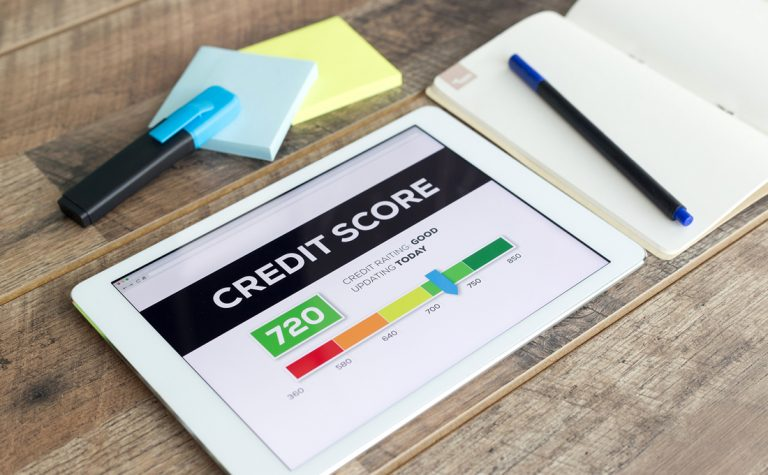

**Objetivo:** Analisar a relação entre as características dos clientes e a probabilidade de default, com o intuito de aprimorar o modelo de credit score e reduzir o risco de crédito.

#### **Perguntas de Pesquisa:**
- Quais características dos clientes são mais propensas a resultar em default?
- Quais padrões comportamentais são indicadores de risco de default?
- Como a renda e o patrimônio dos clientes impactam a probabilidade de default?
- Existe alguma relação entre o nível de escolaridade e a probabilidade de default?

#### **Geração de Hipóteses:**
- Clientes mais jovens e com menor renda tendem a ter maior probabilidade de default.
- Clientes com histórico de crédito ruim (baixo score, dívidas altas, atrasos em pagamentos) são mais propensos a defaultar.
- Clientes com alto volume de transações e alto valor médio de compras podem ter maior risco de default.
- Clientes com maior número de cartões de crédito podem ter maior probabilidade de default.
- Clientes com nível de escolaridade mais baixo podem apresentar maior risco de default.

#### **Insights e Impacto da Análise:**
- **Identificação de Fatores de Risco:** A análise permitirá identificar os principais fatores que influenciam a probabilidade de default, como histórico de crédito, renda, idade e comportamento de gastos.
- **Melhoria do Modelo de Credit Score:** Os insights da análise podem ser usados para melhorar o modelo de credit score, tornando-o mais preciso e eficaz na identificação de clientes de alto risco.
- **Redução do Risco de Crédito:** Com um modelo de credit score mais preciso, o banco poderá reduzir o risco de crédito, concedendo crédito com mais cautela para clientes de alto risco e aumentando a concessão de crédito para clientes de baixo risco.
- **Aumento da Lucratividade:** A redução do risco de crédito pode aumentar a lucratividade do banco, diminuindo as perdas por default e aumentando o retorno sobre o investimento.
- **Melhor Experiência do Cliente:** O modelo de credit score aprimorado pode levar a uma experiência mais justa e transparente para os clientes, com decisões de crédito mais personalizadas e transparentes.

A análise da relação entre as características dos clientes e a probabilidade de default é crucial para o desenvolvimento de um modelo de credit score eficaz. Com a análise dos dados, o banco pode identificar os fatores de risco, aprimorar o modelo de credit score, reduzir o risco de crédito e aumentar a lucratividade. Além disso, o modelo de credit score aprimorado pode contribuir para uma experiência mais justa e transparente para os clientes.

In [338]:
# Separando a base
default_yes = df[df['default'] == 1]
default_no = df[df['default'] == 0]

no, yes = round(df['default'].value_counts(normalize=True) * 100)
print(f'Temos cerca de {int(yes)}% como Default 1 \nE {int(no)}% como Default 0')

Temos cerca de 16% como Default 1 
E 84% como Default 0


### **Gráfico de Proporção:** para visualizar a proporção de inadimplentes (variável "Default") para cada categoria de variáveis categóricas

# ✨ Machine Learning ✨

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/Capa.png" alt="capa">

---

# **Machine Learning** • Credit Card Approval Prediction

Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.

---

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/1.jpg" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Group%201321314401.png" alt="capa" width="55">

 Meu nome é Enzo Schitini, tenho 19 anos. Sou cientista e analista de dados com Python, especialista no desenvolvimento de aplicações Web/Mobile com Bubble, além de planejar e criar interfaces UX & Ui.

Normalmente, para cada projeto que faço, tento usar essas três habilidades (Data Science, Bubble e UX & Ui) juntas, assim consigo por exemplo desenvolver:

- Storytelling com dados usando UX e UI
- Aplicações Data Driven
- Sites, aplicativos e platafosmas web
- Modelos de Machine Learning (Classificação, Classificação e Clusterização)
- Extrair insights dos dados e realizar análises profundas (análises descritivas, diagnósticas, preditivas, e até prescritivas)
- Sistemas que oferecem visualização e interfaces avançadas
- Plataformas de gerenciamento de dados

E muito mais, combinando o melhor dos três mundos. 

Desde os 12 anos, quando estudei robótica, adoro desenvolver softwares. Sempre valorizei o aprendizado prático, com projetos que me ensinaram que depois de horas de dedicação, comprometimento e muita paciência (coisas que fazem parte do processo) é possível alcançar um objetivo.

Hoje, anos depois, muitas coisas mudaram, mas a vontade de desafiar a minha criatividade e ir cada vez mais longe continua viva. 🔥